In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyccl as ccl

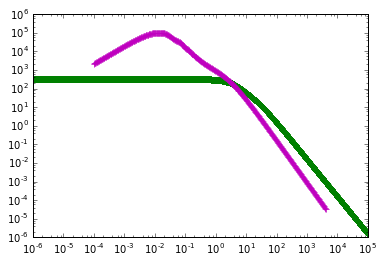

In [13]:
(k_2h, P_2h) = np.loadtxt('../txtfiles/BoostCalc_matterpower_z=0.77.dat', unpack=True)
(k_1h, P_1h) = np.loadtxt('../txtfiles/Pkgm_1h_dndM_survey=LSST_DESI.txt', unpack=True)

plt.figure()
plt.loglog(k_1h, P_1h, 'g+')
plt.hold()
plt.loglog(k_2h, 3.57* P_2h, 'm+')
plt.show()

In [22]:
(k_28, Pk_28) = np.loadtxt('/home/danielle/Documents/CMU/camb/PkForDeltaSigma_matterpower_z=0.28.dat', unpack=True)
(k_77, Pk_77) = np.loadtxt('/home/danielle/Documents/CMU/camb/PkForDeltaSigma_matterpower_z=0.77.dat', unpack=True)

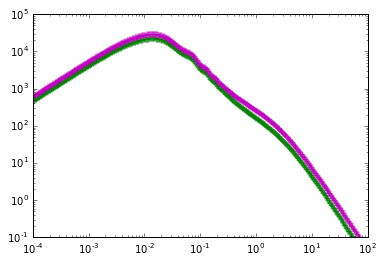

In [25]:
plt.figure()
plt.loglog(k_28, Pk_28, 'g+')
plt.hold()
plt.loglog(k_77, Pk_77, 'm+')
plt.ylim(0.1, 10**5)
plt.xlim(10**(-4), 100)
plt.show()

In [28]:
(r_28, corr_28) = np.loadtxt('../txtfiles/corrForDeltaSigma_2h_z=0.28.txt', unpack=True)
(r_77, corr_77) = np.loadtxt('../txtfiles/corrForDeltaSigma_2h_z=0.77.txt', unpack=True)

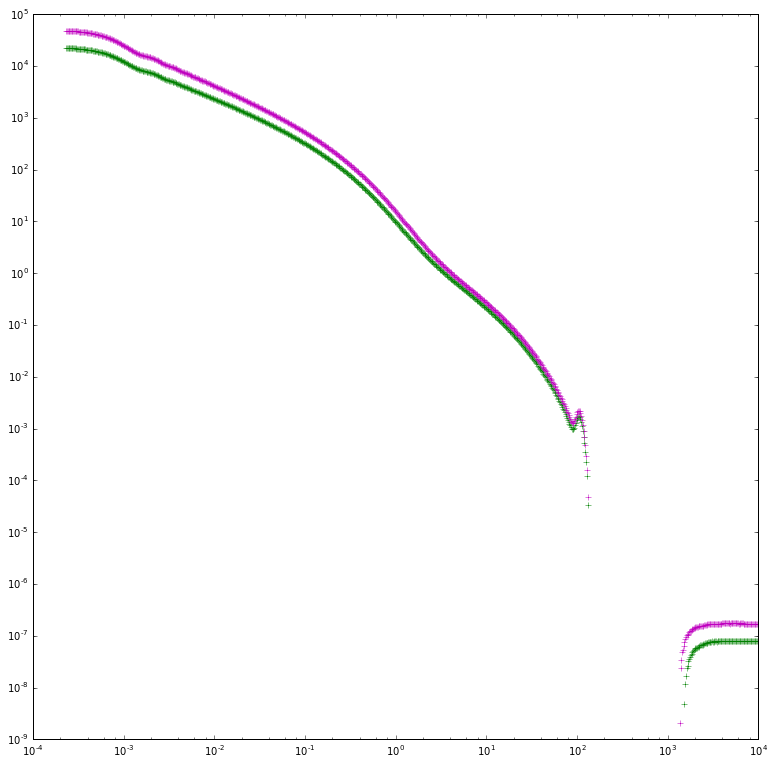

In [32]:
plt.figure(figsize=(13,13))
plt.loglog(r_28, corr_28, 'g+')
plt.hold()
plt.loglog(r_77, corr_77, 'm+')
#plt.ylim(0.1, 10**5)
#plt.xlim(10**(-4), 100)
plt.show()

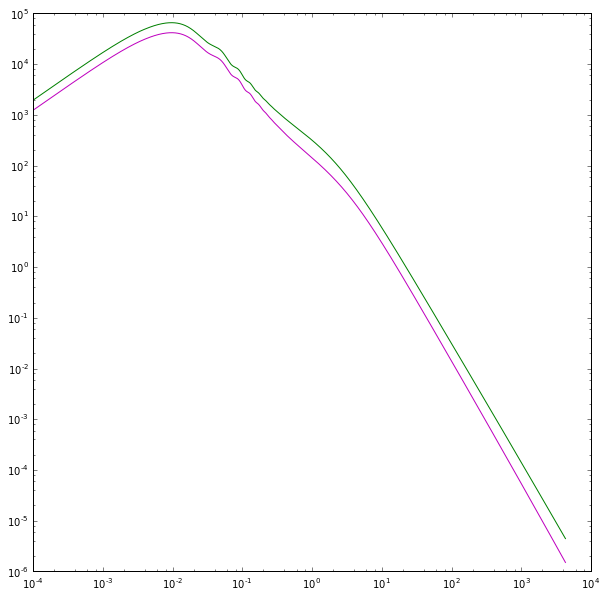

In [37]:
k = np.logspace(-4,np.log10(4.3*10**3), 1000)
p = ccl.Parameters(Omega_c = 0.2, Omega_b = 0.05, h = 0.7, A_s = 2.1*10**(-9), n_s=0.96)
cosmo = ccl.Cosmology(p)
Pk_28 = ccl.nonlin_matter_power(cosmo, k, 1. / (1.+ 0.28))
Pk_77 = ccl.nonlin_matter_power(cosmo, k, 1. / (1.+ 0.77))

stack_28 = np.column_stack((k, Pk_28))
stack_77 = np.column_stack((k,Pk_77))
np.savetxt('../txtfiles/ccl_Pk_0.28.txt', stack_28)
np.savetxt('../txtfiles/ccl_Pk_0.77.txt', stack_77)

plt.figure(figsize=(10,10))
plt.loglog(k, Pk_28, 'g')
plt.hold(True)
plt.loglog(k, Pk_77, 'm')
plt.show()